In [0]:
from fastai import * 
from fastai.vision import *

In [0]:
path = Path('data/animals')

In [0]:
folder = 'tigers'


In [0]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
folder = 'cheetah'


In [0]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
folder = 'leopard'


In [0]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [9]:
path.ls()

[PosixPath('data/animals/tigers'),
 PosixPath('data/animals/cheetah'),
 PosixPath('data/animals/leopard')]

In [0]:
classes = ['tigers', 'cheetah', 'leopard']

In [11]:
download_images('/content/tigers', '/content/data/animals/tigers', max_pics=500)

In [12]:
download_images('/content/leopard', '/content/data/animals/leopard', max_pics=500)

In [13]:
download_images('/content/cheetah', '/content/data/animals/cheetah', max_pics=500)

Remove images that are not opening

In [14]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

tigers


cheetah


leopard


In [0]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), 
                                  size=224).normalize(imagenet_stats)

In [16]:
data.classes

['cheetah', 'leopard', 'tigers']

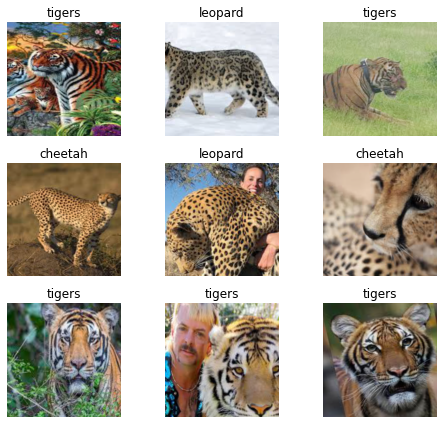

In [17]:
data.show_batch(rows=3, figsize=(7,6))

In [18]:
data.c, len(data.train_ds), len(data.valid_ds)

(3, 448, 112)

In [19]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.389070,0.238041,0.080357,00:08
1,0.761025,0.030806,0.008929,00:07
2,0.543011,0.017174,0.000000,00:07
3,0.418496,0.019638,0.000000,00:07


In [0]:
learn.save('learn_model')

In [0]:
learn.unfreeze()

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


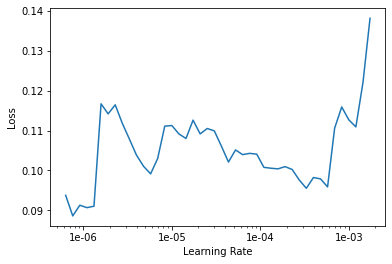

In [24]:
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.116134,0.019518,0.008929,00:08
1,0.132952,0.030258,0.017857,00:08


In [0]:
learn.save('stage-2')

In [27]:
interpret = ClassificationInterpretation.from_learner(learn)

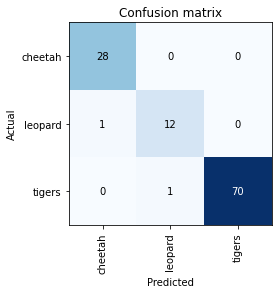

In [28]:
interpret.plot_confusion_matrix()

In [0]:
learn.export()